<h1>Questions to be handed in on derivatives:</h1>

<p>To get started, we load the <code>MTH229</code> package:</p>

In [ ]:
using MTH229

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/derivatives.html">Approximate derivatives in julia</a>.</p>

<p>For the impatient, A secant line connecting points on the graph of $f(x)$ between $x=c$ and $x = c+h$ has slope:</p>


$$
\frac{f(c+h) - f(c)}{h}.
$$


<p>The slope of the tangent line to the graph of $f(x)$ at the point $(c,f(c))$ is given by taking the limit as $h$ goes to $0$:</p>


$$
\lim_{h \rightarrow 0} \frac{f(c + h) - f(c)}{h}.
$$


<p>The notation for this - when the limit exists - is $f'(c)$.</p>

<p>In general the derivative of a function $f(x)$ is the function $f'(x)$, which returns the slope of the tangent line for each $x$ where it is defined. For many functions, finding the derivative is straightforward, though my be complicated. At times approximating the value is desirable.</p>

<h4>Approximate derivatives</h4>

<p>We can approximate the slope of the tangent line several ways. The <em>forward difference quotient</em> takes a small value of $h$ and uses the values $(f(x+h) - f(x))/h$ as an approximation.</p>

<p>For example, to estimate the derivative of $x^x$ at $c=1$ with <code>h&#61;1e-6</code> we could have</p>

In [ ]:
f(x) = x^x
c, h = 1, 1e-6
(f(c+h) - f(c))/h

1.000001000006634

<p>The above pattern finds the approximate derivative at the point $c$. Though this can be pushed to return a function giving the derivative at any point, we will use the more convenient solution described next for finding the derivative as a function, when applicable.</p>

<h4>Automatic derivatives</h4>

<p>In mathematics we use the notation $f'(x)$ to refer the function that finds the derivative of $f(x)$ at a given $x$. The <code>MTH229</code> package implements the same notation in <code>Julia</code>. (Though at the cost of a warning when the package is loaded.). This uses <em>automatic differentiation</em>, as provided by the <code>ForwardDiff</code> package, to compute. Automatic differentiation is a tad slower than using a hand-computed derivative, but as accurate and easier than using an <em>approximate derivative</em>. When available, automatic differentiation gives a convenient numeric value for the true derivative.</p>

<p>The usual notation for a derivative is used:</p>

In [ ]:
f(x) = sin(x)
f'(pi), f''(pi) 

(-1.0,-1.2246467991473532e-16)

<h4>Symbolic derivatives</h4>

<p>Automatic differentiation gives accurate numeric values for first, second, and even higher-order derivatives. It does not however, return the expression one would get were these computed by hand. The <code>diff</code> function from <code>SymPy</code> will find symbolic derivatives, similar to what is achieved when differentiating "by hand."</p>

<p>The <code>diff</code> function can be called with a function:</p>

In [ ]:
f(x) = exp(x) * sin(x)
diff(f)

exp(x)*sin(x) + exp(x)*cos(x)

<p>A more general usage is supported, but not explored here.</p>

<h3>Questions</h3>

<ul>
<li>Calculate the slope of the secant line of $f(x) = 3x^2 + 5$ between   $(2,f(2))$ and $(4, f(4))$.</li>
</ul>

<ul>
<li>For the function $f(x) = 3x^2 + 5$ between   $(2,f(2))$ and $(4, f(4))$ plot the   function and the secant line. Estimate from the graph the largest   distance between the two functions from $x_0$ to $x_1$.</li>
</ul>

<ul>
<li>Consider the following <code>Julia</code> commands:</li>
</ul>

In [ ]:
f(x) = sin(x)
sl(h) = (sin(pi/3 + h) - sin(pi/3)) / h
sl(0.1), sl(0.01), sl(0.001), sl(0.0001)

(0.45590188541076104,0.4956615757736871,0.49956690400077,0.4999566978958203)

<p>These show what?</p>


&#10054; The limit of `sin(x)` as `h` goes to `0` is `0.5`

&#10054; The limit of `sin(pi/3 + h)` as `h` goes to `0` is `0.5`

&#10054; The derivative of `sin` at `pi/3` is `1/2`




<ul>
<li>Let $f(x) = 1/x$ and $c=4$. Find the approximate derivative (forward) when   <code>h&#61;1e-6</code>.</li>
</ul>

<ul>
<li>Let $f(x) = x^x$ and $c=4$. Find the approximate derivative   (forward) when <code>h&#61;1e-4</code>.</li>
</ul>

<ul>
<li>For $f(x) = x^x$ and $c =4$, use $f'(c)$ to find the numeric (automatic) derivative:</li>
</ul>

<ul>
<li>Use the automatic derivative to find the slope of the tangent line at $x = 1/2$ for the graph of the function:</li>
</ul>


$$
f(x) = log(\frac{1 + \sqrt{1 - x^2}}{x}) - \sqrt{1 - x^2}.
$$


<ul>
<li>Let $f(x) = \sin(x)$. Following the example on p124 of the Rogawski   book we look at a table of values of the forward difference equation   at $c=\pi/6$ for various values of $h$. The true derivative is   $\cos(\pi/6) = \sqrt{3}/2$.</li>
</ul>

<p>Make the following table. </p>

In [ ]:
f(x) = sin(x)
c = pi/6
hs = [(1/10)^i for i in 1:12]
ys = [(f(c+h) - f(c))/h for h in hs] - sqrt(3)/2
[hs ys]

12x2 Array{Any,2}:
 0.1      -0.0264218  
 0.01     -0.00251441 
 0.001    -0.000250144
 0.0001   -2.50014e-5 
 1.0e-5   -2.50002e-6 
 1.0e-6   -2.49917e-7 
 1.0e-7   -2.51525e-8 
 1.0e-8   -2.39297e-9 
 1.0e-9    1.42604e-8 
 1.0e-10   1.80794e-7 
 1.0e-11  -1.48454e-6 
 1.0e-12   4.06657e-6 

<p>What size <code>h</code> has the closest approximation?</p>


&#10054; 1e-1

&#10054; 1e-2

&#10054; 1e-3

&#10054; 1e-4

&#10054; 1e-5

&#10054; 1e-6

&#10054; 1e-7

&#10054; 1e-8

&#10054; 1e-9

&#10054; 1e-10

&#10054; 1e-11

&#10054; 1e-12




<ul>
<li>For the same $f(x)=\sin(x)$ and $c=\pi/6$, how accurate is the automatic derivative found with <code>f&#39;</code>?</li>
</ul>

<hr />

<ul>
<li>Let $f(x) = (x^3 + 5) \cdot (x^3 + x + 1)$. The derivative of this function   has one real zero. Find it. (You can use <code>fzero</code> with the derivative   function after plotting to identify a bracketing interval.)</li>
</ul>

<ul>
<li> Make a plot of $f(x) = \log(x+1) - x + x^2/2$ and its derivative over the interval $[-3/4, 4]$. The commands are:</li>
</ul>

<p>Is the derivative always increasing?</p>


&#10054; Yes

&#10054; No




<ul>
<li>Let $f(x) = (x + 2)/(1 + x^3)$. Plot both $f$ and its    derivative on the interval $[0,5]$. Identify the zero of the   derivative. What is its value? What is the value of $f(x)$ at this   point?</li>
</ul>

<p>What commands produce the plot?</p>

<p>What is the zero of the derivative on this interval?</p>

<p>What is the value of $f$ at this point:</p>

<ul>
<li>The function $f(x) = x^x$ has a derivative for $x > 0$. Use <code>fzero</code>   to find a zero of its derivative. What is the value of the zero?</li>
</ul>

<ul>
<li>Using the <code>diff</code> function from the <code>SymPy</code> package, identify the proper derivative of $x^x$:</li>
</ul>


&#10054; $x \cdot x^{(x-1)}$

&#10054; $x^x \cdot (\log(x) + 1)$

&#10054; $x^x$

&#10054; $x^{(x+1)} / (x+1)$




<p>Letting $c=4$, we can find how accurate <code>f&#39;&#40;c&#41;</code> is for $f(x) = x^x$ by using the expression found in the last answer evaluted at $c$ and taking the difference with <code>f&#40;c&#41;</code>. How big is the difference?</p>

<ul>
<li>Using the <code>diff</code> function, find the derivative of the inverse tangent, $\tan^{-1}(x)$ (<code>atan</code>). What is the function?</li>
</ul>


&#10054; $1/(x^2 + 1)$

&#10054; $(-1)\cdot\tan^{-2}(x)$

&#10054; $(-1)\cdot\tan^{-2}(x) \cdot (\tan^2(x) + 1)$




<h2>Some applications</h2>

<ul>
<li>Suppose the height of a ball falls according to the formula $h(t) =   300 - 16t^2$. Find the rate of change of height at the instant the   ball hits the ground.</li>
</ul>

<ul>
<li>A formula for blood alcohol level in the body based on time is based   on the number of drinks and the time   <a href="http://en.wikipedia.org/wiki/Blood_alcohol_content">wikipedia</a>.</li>
</ul>

<p>Suppose a model for the number of drinks consumed per hour is </p>

In [ ]:
n(t) = t <= 3 ? 2 * sqrt(3) * sqrt(t) : 6.0

n (generic function with 1 method)

<p>Then the BAL for a 175 pound male is given by</p>

In [ ]:
bal(t) = (0.806 * 1.2 * n(t)) / (0.58 * 175 / 2.2) - 0.017*t

bal (generic function with 1 method)

<p>From the plot below, describe when the peak blood alcohol level occurs and is the person ever in danger of being above 0.10?</p>

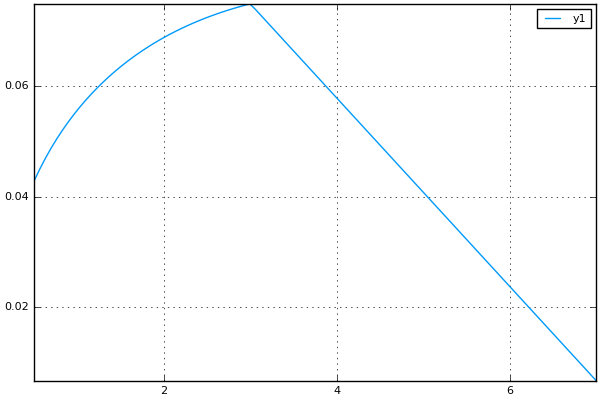

In [ ]:
plot(bal, .5,7)

<ul>
<li>Plot the derivative of <code>bal</code> over the time $[0.5, 7]$.  Is this function ever positive?</li>
</ul>


&#10054; Yes, initially

&#10054; Yes, after 3

&#10054; No, it never is




<h3>Tangent lines</h3>

<p>The tangent line to the graph of $f(x)$ at $x=c$ is given by $y = f(c) + f'(c)(x-c)$. It is fairly easy to plot both the function and its tangent line - we just need a function to compute the tangent line.</p>

<p>Here we write an operator to return such a function.  The operator needs to know both the function name and the value $c$ to find the tangent line at $(c, f(c))$ (notice the <code>x-&gt;</code> bit indicating the following returns a  function):</p>

In [ ]:
tangent(f, c) = x -> f(c) + f'(c)*(x-c) # returns a function

<p>(This function is in the <code>MTH229</code> package.)</p>

<p>Here we see how to use it:</p>

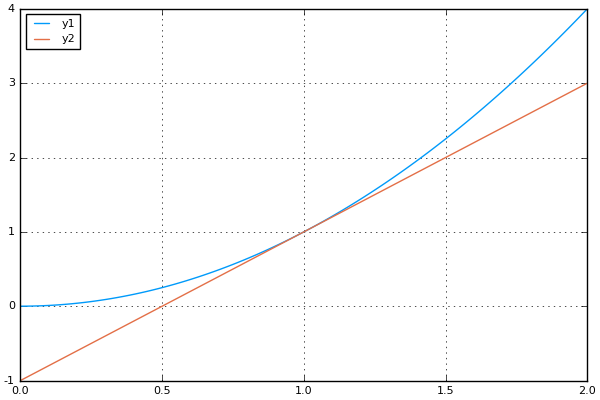

In [ ]:
f(x) = x^2			# replace me
plot(f, 0, 2)
plot!(tangent(f, 1), 0, 2)

<ul>
<li>For the function $f(x) = 1/(x^2 + 1)$ (The witch of Agnesi), graph $f$ over the interval $[-3,3]$ and the tangent line to $f$ at $x=1$. The tangent line intersects the graph at $x=1$, where else?</li>
</ul>

<ul>
<li>Let $f(x) = x^3 -2x - 5$. Find the intersection of the tangent line   at $x=3$ with the $x$-axis.</li>
</ul>

<ul>
<li>Let $f(x)$ be given by the expression below. </li>
</ul>

In [ ]:
f(x; a=1) = a * log((a + sqrt(a^2 - x^2))/x ) - sqrt(a^2 - x^2)

f (generic function with 1 method)

<p>The value of <code>a</code> is a parameter, the default value of $a=1$ is fine.</p>

<p>For $x=0.25$ and $x=0.75$ the tangent lines can be drawn with</p>

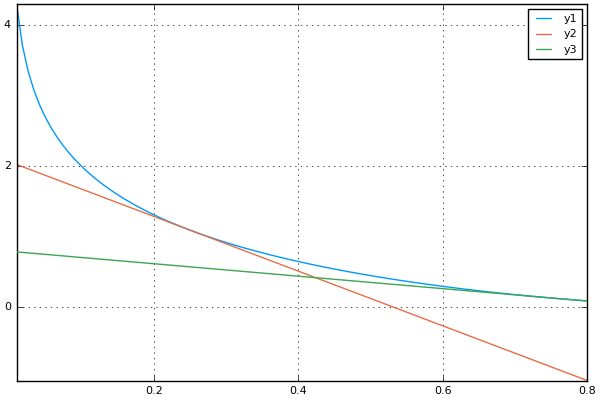

In [ ]:
u, v = 0.01, 0.8
plot(f, u, v)
plot!(tangent(f, 0.25), u, v)
plot!(tangent(f, 0.75), u, v)

<p>Verify that the length of the tangent line between $(c, f(c))$ and the $y$ axis is the same for $c=0.25$ and $c=0.75$. (For any $c$, the distance formula can be used to find the distance between the point $(c, f(c))$ and $(0, y_0)$ where, $y_0$ is where the tangent line at $c$ crosses the $y$ axis.)</p>

<h4>Higher-order derivatives</h4>

<p>Higher-order derivates can be approximated as well. For example, one can use <code>f&#39;&#39;</code> to approximate the second derivative.</p>

<ul>
<li>Find the second derivative of $f(x) = \sqrt{x \cdot e^x}$ at $c=2$.</li>
</ul>

<ul>
<li>Find the zeros in $[0, 10]$ of the second derivative of the function $f(x) = \sin(2x) + 3\sin(4x)$ using <code>fzeros</code>.</li>
</ul>


&#10054; 13 numbers: 0.0, 0.869122, ..., 8.55566, 9.42478

&#10054; 13 numbers: 0.0, 0.806238, ..., 8.61854, 9.42478

&#10054; 13 numbers: 0.420534, 1.20943, ..., 9.00424, 9.84531


